# Weather Prediction Model für Stuttgart

## 1. Datensatz zu .csv konvertieren

Mit Excel wurde einzelne Tabellenblätter zusammengefasst und ein gesamter Datensatz generiert: 

-> Tageswerte der Stuttgarter Wetterstation S-Mitte von 2001-2022  
-> 7.696 Tage mit Daten wie Temperatur, Niederschlag, Luftdruck etc. (teilweise unvollständig) 


# 2. .csv Datei einlesen und anschauen

Arbeit mit Pandas Bibliothek
Probleme: Formatierungen

-> Komma zu Punkt, deutsche Excel seperiert mit Semikolon, Header muss manuell hinzugefügt werden 

-> Reihe *Tage* wurde manuell in Excel hinzugefügt

#### Achtung Schaltjahre! Tage wurden weggelassen um immer auf 365 zu kommen

In [28]:
import pandas as pd


In [2]:
col_names = ["Datum","Mittel Temp. (°C)", "Max Temp. (°C)", "Min Temp. (°C)", "Mittel Feuchte (%)","Summe Niederschlag (l/m²)","Mittel UVA-Str. (W/m²)","Mittel UVB-Str. (W/m²)","Tage"]
data = pd.read_csv('SZ-Tages-Werte-2000-2021_new.csv', names=col_names, sep=';')
data_np=pd.read_csv('SZ-Tages-Werte-2000-2021_new.csv', names=col_names, sep=';')

In [3]:
data.head()

,Datum,Mittel Temp. (°C),Max Temp. (°C),Min Temp. (°C),Mittel Feuchte (%),Summe Niederschlag (l/m²),Mittel UVA-Str. (W/m²),Mittel UVB-Str. (W/m²),Tage
0,01.01.2001,2.2,6.0,-2.7,61.6,0.37,2.34,0.026,1
1,02.01.2001,7.1,8.9,4.2,77.0,1.37,2.03,0.026,2
2,03.01.2001,6.8,9.3,2.9,72.1,0.02,3.56,0.034,3
3,04.01.2001,6.2,8.3,3.0,75.7,1.03,2.22,0.026,4
4,05.01.2001,8.7,11.7,6.3,73.1,4.51,1.83,0.025,5


In [4]:
data.columns

Index(['Datum', 'Mittel Temp. (°C)', 'Max Temp. (°C)', 'Min Temp. (°C)',
       'Mittel Feuchte (%)', 'Summe Niederschlag (l/m²)',
       'Mittel UVA-Str. (W/m²)', 'Mittel UVB-Str. (W/m²)', 'Tage'],
      dtype='object')

## 2.1 DatumTyp ändern

In [5]:
data.dtypes

Datum                         object
Mittel Temp. (°C)            float64
Max Temp. (°C)               float64
Min Temp. (°C)               float64
Mittel Feuchte (%)           float64
Summe Niederschlag (l/m²)    float64
Mittel UVA-Str. (W/m²)       float64
Mittel UVB-Str. (W/m²)       float64
Tage                           int64
dtype: object

In [6]:
data['Datum']=pd.to_datetime(data['Datum'],format="%d.%m.%Y")

In [7]:
data.head()

,Datum,Mittel Temp. (°C),Max Temp. (°C),Min Temp. (°C),Mittel Feuchte (%),Summe Niederschlag (l/m²),Mittel UVA-Str. (W/m²),Mittel UVB-Str. (W/m²),Tage
0,2001-01-01,2.2,6.0,-2.7,61.6,0.37,2.34,0.026,1
1,2001-01-02,7.1,8.9,4.2,77.0,1.37,2.03,0.026,2
2,2001-01-03,6.8,9.3,2.9,72.1,0.02,3.56,0.034,3
3,2001-01-04,6.2,8.3,3.0,75.7,1.03,2.22,0.026,4
4,2001-01-05,8.7,11.7,6.3,73.1,4.51,1.83,0.025,5


In [8]:
data.dtypes

Datum                        datetime64[ns]
Mittel Temp. (°C)                   float64
Max Temp. (°C)                      float64
Min Temp. (°C)                      float64
Mittel Feuchte (%)                  float64
Summe Niederschlag (l/m²)           float64
Mittel UVA-Str. (W/m²)              float64
Mittel UVB-Str. (W/m²)              float64
Tage                                  int64
dtype: object

## 2.2 Wetter Daten graphisch anschauen

In [29]:
from matplotlib import pyplot as plt

#### Datum in Relation zur Temperatur

<function matplotlib.pyplot.show(close=None, block=None)>

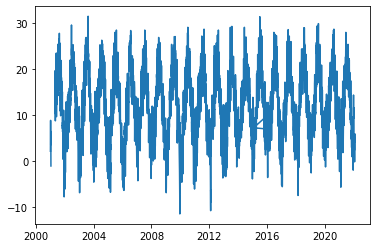

In [10]:
plt.plot(data['Datum'],data['Mittel Temp. (°C)'])
plt.show

#### Datum in Relation zum Niederschlag (Unwetter Juni 2021)

<function matplotlib.pyplot.show(close=None, block=None)>

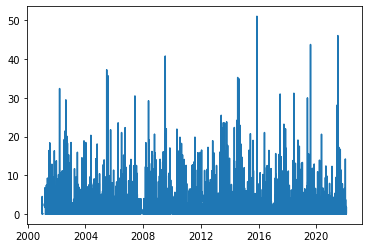

In [11]:
plt.plot(data['Datum'],data['Summe Niederschlag (l/m²)'])
plt.show

In [12]:
print(data[data["Datum"] == '2021-06-29'])

          Datum  Mittel Temp. (°C)  Max Temp. (°C)  Min Temp. (°C)  \
7479 2021-06-29               19.2            26.0            13.4   

      Mittel Feuchte (%)  Summe Niederschlag (l/m²)  Mittel UVA-Str. (W/m²)  \
7479                77.9                       34.5                    8.96   

      Mittel UVB-Str. (W/m²)  Tage  
7479                   0.212   180  


#### -> Niederschlag schwierig, da keine Saisonalität vorhanden, zufällige Stürme etc.

# 3. Temperatur Model trainieren

Hier wird mit den einzelnen Tagen im Jahr gearbeitet

In [3]:
temp = data_np[['Tage','Mittel Temp. (°C)']]

## 3.1 Vorbereiten der Daten

In [4]:
temp

,Tage,Mittel Temp. (°C)
0,1,2.2
1,2,7.1
2,3,6.8
3,4,6.2
4,5,8.7
...,...,...
7691,27,2.0
7692,28,4.8
7693,29,5.3
7694,30,6.0


Überprüfen ob es fehlende Daten gibt

In [5]:
temp.isna().sum().sum()

124

 -> Es gibt 124 leere Felder 

In [6]:
temp = temp.dropna()
temp.isna().sum().sum()
temp

,Tage,Mittel Temp. (°C)
0,1,2.2
1,2,7.1
2,3,6.8
3,4,6.2
4,5,8.7
...,...,...
7691,27,2.0
7692,28,4.8
7693,29,5.3
7694,30,6.0


Exportieren zu einem Numpy Array

In [7]:
import numpy as np

In [8]:
np_temp=temp["Mittel Temp. (°C)"].to_numpy()
np_temp

array([2.2, 7.1, 6.8, ..., 5.3, 6. , 4.2])

In [9]:
np_date=temp["Tage"].to_numpy()
np_date

array([ 1,  2,  3, ..., 29, 30, 31], dtype=int64)

Normalisieren des Datums und shuffeln

In [10]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [11]:
np_date, np_temp = shuffle(np_date, np_temp)

In [12]:
np_date

array([126, 161,  86, ..., 187, 240,  61], dtype=int64)

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
np_date_scaled=scaler.fit_transform(np_date.reshape(-1,1))
np_date_scaled

array([[0.41208791],
       [0.90384615],
       [0.3489011 ],
       ...,
       [0.23076923],
       [0.1456044 ],
       [0.02747253]])

In [24]:
np_temp

array([16.9,  4.7, 11.6, ..., 13.3,  3.8,  6.5])

In [25]:
np_date_scaled

array([[0.41208791],
       [0.90384615],
       [0.3489011 ],
       ...,
       [0.23076923],
       [0.1456044 ],
       [0.02747253]])

Datensatz spliten um Trainings- und Testdaten zu generieren (90% Training, 10% Test)

In [26]:
splitter=(np.round(np_temp.size*0.9)).astype(int)
splitter

6815

In [27]:
temp_train=np_temp[:splitter]
temp_test=np_temp[splitter:]
date_train=np_date_scaled[:splitter]
date_test=np_date_scaled[splitter:]

## 3.2 Sequential Model bauen und trainieren


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [14]:
temp_model = Sequential([Dense(units=16, activation="relu", input_shape=(1,)), 
                   Dense(units=32, activation="relu"),
                   Dense(units=1)])

In [15]:
temp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [16]:
temp_model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error", metrics=[keras.metrics.MeanAbsoluteError()])

In [33]:
temp_model.fit(x=np_date, y=np_temp, epochs=10)

Epoch 1/10
237/237 [==============================] - 1s 2ms/step - loss: 13908.7959 - mean_absolute_error: 102.4677
Epoch 2/10
237/237 [==============================] - 1s 2ms/step - loss: 3213.5703 - mean_absolute_error: 49.7623
Epoch 3/10
237/237 [==============================] - 1s 3ms/step - loss: 609.3344 - mean_absolute_error: 21.6949
Epoch 4/10
237/237 [==============================] - 1s 3ms/step - loss: 132.4293 - mean_absolute_error: 9.6515
Epoch 5/10
237/237 [==============================] - 1s 2ms/step - loss: 80.6782 - mean_absolute_error: 7.6246
Epoch 6/10
237/237 [==============================] - 1s 2ms/step - loss: 77.6245 - mean_absolute_error: 7.4301
Epoch 7/10
237/237 [==============================] - 1s 2ms/step - loss: 77.5413 - mean_absolute_error: 7.4077
Epoch 8/10
237/237 [==============================] - 1s 2ms/step - loss: 77.5058 - mean_absolute_error: 7.4042
Epoch 9/10
237/237 [==============================] - 1s 2ms/step - loss: 77.4597 - mean_abso

## 3.3 Validierungsdatensatz testen und Werte einfügen

Erste Probe Validierungssätze

In [21]:
temp_model.fit(x=np_date, y=np_temp, validation_split=0.1, epochs=50)

Epoch 1/50
213/213 [==============================] - 1s 3ms/step - loss: 19.1424 - mean_absolute_error: 3.4982 - val_loss: 17.0092 - val_mean_absolute_error: 3.2565
Epoch 2/50
213/213 [==============================] - 1s 4ms/step - loss: 19.0440 - mean_absolute_error: 3.4969 - val_loss: 16.5554 - val_mean_absolute_error: 3.2008
Epoch 3/50
213/213 [==============================] - 1s 4ms/step - loss: 18.7573 - mean_absolute_error: 3.4667 - val_loss: 16.6681 - val_mean_absolute_error: 3.2365
Epoch 4/50
213/213 [==============================] - 1s 4ms/step - loss: 18.6520 - mean_absolute_error: 3.4532 - val_loss: 16.9040 - val_mean_absolute_error: 3.2388
Epoch 5/50
213/213 [==============================] - 1s 4ms/step - loss: 18.7521 - mean_absolute_error: 3.4696 - val_loss: 17.1345 - val_mean_absolute_error: 3.2636
Epoch 6/50
213/213 [==============================] - 1s 4ms/step - loss: 18.4370 - mean_absolute_error: 3.4393 - val_loss: 17.3859 - val_mean_absolute_error: 3.2812
Epoc

213/213 [==============================] - 1s 3ms/step - loss: 16.0389 - mean_absolute_error: 3.2118 - val_loss: 13.9304 - val_mean_absolute_error: 2.9325


Test Predictions für die Mitte des Jahres:

In [24]:
temp_model.predict(np.array([182]))

array([[21.097153]], dtype=float32)

#### -> Validation und Training Absolute Error ca. 3, kein Overfitting

im Modell wurden mit den nicht MinMax gescalten Werten gearbeitet, da kein großer Unterschied festgestellt werden konnte und in JavaScript besser das aktuelle Datum zum Tag konvertiert werden kann

# 4. Niederschlag Modell trainieren

In [39]:
rain = data_np[['Tage','Summe Niederschlag (l/m²)']]

## 3.1 Vorbereiten der Daten

In [40]:
rain

,Tage,Summe Niederschlag (l/m²)
0,1,0.37
1,2,1.37
2,3,0.02
3,4,1.03
4,5,4.51
...,...,...
7691,27,1.90
7692,28,0.00
7693,29,0.20
7694,30,0.20


Überprüfen ob es fehlende Daten gibt

In [41]:
rain.isna().sum().sum()

122

-> Es gibt 122 leere Felder

In [42]:
rain = rain.dropna()
rain.isna().sum().sum()
rain

,Tage,Summe Niederschlag (l/m²)
0,1,0.37
1,2,1.37
2,3,0.02
3,4,1.03
4,5,4.51
...,...,...
7691,27,1.90
7692,28,0.00
7693,29,0.20
7694,30,0.20


Exportieren zu einem Numpy Array

In [43]:
np_rain_date=rain["Tage"].to_numpy()
np_rain_date

array([ 1,  2,  3, ..., 29, 30, 31], dtype=int64)

In [44]:
np_rain=rain["Summe Niederschlag (l/m²)"].to_numpy()
np_rain

array([0.37, 1.37, 0.02, ..., 0.2 , 0.2 , 1.6 ])

In [45]:
np_rain.dtype

dtype('float64')

Normalisieren des Datums und shuffeln

In [46]:
np_rain_date, np_rain = shuffle(np_rain_date, np_rain)

In [47]:
scaler = MinMaxScaler(feature_range=(0,1))
np_rain_date_scaled=scaler.fit_transform(np_rain_date.reshape(-1,1))
np_rain_date_scaled

array([[0.26648352],
       [0.43131868],
       [0.57142857],
       ...,
       [0.80769231],
       [0.35714286],
       [0.77472527]])

In [48]:
np_rain

array([0.  , 4.28, 4.67, ..., 0.27, 0.  , 2.14])

Datensatz spliten um Trainings- und Testdaten zu generieren (90% Training, 10% Test)

In [49]:
splitter=(np.round(np_rain.size*0.9)).astype(int)
splitter

6817

In [50]:
rain_train=np_rain[:splitter]
rain_test=np_rain[splitter:]
rain_date_train=np_rain_date_scaled[:splitter]
rain_date_test=np_rain_date_scaled[splitter:]

# 4.2 Sequential Model bauen und trainieren

In [51]:
rain_model = Sequential([Dense(units=16, activation="relu", input_shape=(1,)), 
                   Dense(units=32, activation="relu"),
                   Dense(units=1)])

In [52]:
rain_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [53]:
rain_model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error", metrics=[keras.metrics.MeanAbsoluteError()])

In [54]:
rain_model.fit(x=np_rain_date, y=np_rain, epochs=10)

Epoch 1/10
237/237 [==============================] - 1s 3ms/step - loss: 73.6873 - mean_absolute_error: 5.5804
Epoch 2/10
237/237 [==============================] - 1s 3ms/step - loss: 12.2754 - mean_absolute_error: 1.8208
Epoch 3/10
237/237 [==============================] - 1s 3ms/step - loss: 12.2721 - mean_absolute_error: 1.8598
Epoch 4/10
237/237 [==============================] - 1s 3ms/step - loss: 12.2627 - mean_absolute_error: 1.8532
Epoch 5/10
237/237 [==============================] - 1s 3ms/step - loss: 12.2625 - mean_absolute_error: 1.8460
Epoch 6/10
237/237 [==============================] - 1s 3ms/step - loss: 12.2624 - mean_absolute_error: 1.8567
Epoch 7/10
237/237 [==============================] - 1s 3ms/step - loss: 12.2447 - mean_absolute_error: 1.8471
Epoch 8/10
237/237 [==============================] - 1s 4ms/step - loss: 12.2312 - mean_absolute_error: 1.8513
Epoch 9/10
237/237 [==============================] - 1s 3ms/step - loss: 12.2554 - mean_absolute_error:

## 4.3 Validierungsdatensatz testen und Werte einfügen

Erste Probe Validierungssätze

In [55]:
rain_model.fit(x=np_rain_date, y=np_rain, validation_split=0.1, epochs=30)

Epoch 1/30
213/213 [==============================] - 1s 3ms/step - loss: 11.7832 - mean_absolute_error: 1.8642 - val_loss: 16.0020 - val_mean_absolute_error: 1.8527
Epoch 2/30
213/213 [==============================] - 1s 2ms/step - loss: 11.7762 - mean_absolute_error: 1.8533 - val_loss: 15.9860 - val_mean_absolute_error: 1.9321
Epoch 3/30
213/213 [==============================] - 1s 2ms/step - loss: 11.7554 - mean_absolute_error: 1.8544 - val_loss: 15.9706 - val_mean_absolute_error: 1.8981
Epoch 4/30
213/213 [==============================] - 0s 2ms/step - loss: 11.7615 - mean_absolute_error: 1.8575 - val_loss: 16.0578 - val_mean_absolute_error: 2.0664
Epoch 5/30
213/213 [==============================] - 1s 3ms/step - loss: 11.7353 - mean_absolute_error: 1.8650 - val_loss: 15.9639 - val_mean_absolute_error: 1.8440
Epoch 6/30
213/213 [==============================] - 1s 3ms/step - loss: 11.7299 - mean_absolute_error: 1.8590 - val_loss: 15.9373 - val_mean_absolute_error: 1.9276
Epoc

# 5. Als TensorFlow.js exportieren

In [29]:
import tensorflowjs as tfjs

In [113]:
tfjs.converters.save_keras_model(temp_model,'tensorflowjs')

In [128]:
tfjs.converters.save_keras_model(rain_model,'tensorflowjs')

# 6. Recurrent Neural Networks (als Test)


https://www.tensorflow.org/tutorials/structured_data/time_series

Training mit rekurrenten neuralen Netzen (RNN's), LTSM (Long short-term memory) sehr beliebt innerhalb von RNNs

https://www.ibm.com/cloud/learn/recurrent-neural-networks

![alt text](rnn.png "Title")

![alt text](rnn_test.png "Title")

In [26]:
rnn_data = data[["Datum","Mittel Temp. (°C)"]]
rnn_data.head()

,Datum,Mittel Temp. (°C)
0,01.01.2001,2.2
1,02.01.2001,7.1
2,03.01.2001,6.8
3,04.01.2001,6.2
4,05.01.2001,8.7


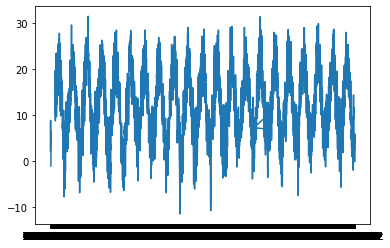

In [30]:
plt.plot(rnn_data['Datum'],rnn_data['Mittel Temp. (°C)'])

Überprüfen ob es fehlende Daten gibt

In [31]:
rnn_data.isna().sum().sum()

124

In [32]:
rnn_data = rnn_data.dropna()
rnn_data.isna().sum().sum()
rnn_data

,Datum,Mittel Temp. (°C)
0,01.01.2001,2.2
1,02.01.2001,7.1
2,03.01.2001,6.8
3,04.01.2001,6.2
4,05.01.2001,8.7
...,...,...
7691,27.01.2022,2.0
7692,28.01.2022,4.8
7693,29.01.2022,5.3
7694,30.01.2022,6.0


Aufteilen in Taining und Test

In [33]:
r_splitter=(np.round(rnn_data[['Mittel Temp. (°C)']].size*0.9)).astype(int)
r_splitter


6815

In [34]:
rnn_train=rnn_data[['Mittel Temp. (°C)']][:r_splitter]
rnn_train

,Mittel Temp. (°C)
0,2.2
1,7.1
2,6.8
3,6.2
4,8.7
...,...
6934,2.8
6935,2.9
6936,1.1
6937,6.6


In [35]:
rnn_test=rnn_data[['Mittel Temp. (°C)']][r_splitter:]
rnn_test

,Mittel Temp. (°C)
6939,5.5
6940,2.6
6941,4.9
6942,5.7
6943,11.7
...,...
7691,2.0
7692,4.8
7693,5.3
7694,6.0


In [36]:
scaler=MinMaxScaler(feature_range=(0,1))

In [37]:
rnn_train_scaled=scaler.fit_transform(rnn_train)

In [38]:
rnn_test_scaled=scaler.fit_transform(rnn_test)

In [39]:
rnn_train_scaled

array([[0.31701632],
       [0.43123543],
       [0.42424242],
       ...,
       [0.29137529],
       [0.41958042],
       [0.40792541]])

In [23]:
from keras.preprocessing.sequence import TimeseriesGenerator

Time Serier Generator wird definiert

In [ ]:
generator = TimeseriesGenerator (rnn_train_scaled, rnn_train_scaled, length=12, batch_size=1)

Hier sieht man die Idee: aus 12 Inputs wird ein Output geplottet usw.

In [25]:
X,y = generator[0]
print(f'X Array: \n{X.flatten()}')
print(f'Y Array: \n{y}')

X Array: 
[0.31701632 0.43123543 0.42424242 0.41025641 0.46853147 0.47319347
 0.4032634  0.37762238 0.34965035 0.36829837 0.41724942 0.31235431]
Y Array: 
[[0.26340326]]


In [26]:
from keras.layers import LSTM

In [46]:
rnn_model = Sequential([LSTM(units=40, activation="relu", input_shape=(12,1)), 
                   Dense(units=1)])

In [47]:
rnn_model.compile(optimizer='adam', loss='mse')

In [48]:
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40)                6720      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [49]:
rnn_model.fit(generator,epochs=10)

Epoch 1/10
6803/6803 [==============================] - 258s 38ms/step - loss: 0.0049
Epoch 2/10
6803/6803 [==============================] - 255s 37ms/step - loss: 0.0028
Epoch 3/10
6803/6803 [==============================] - 254s 37ms/step - loss: 0.0027
Epoch 4/10
6803/6803 [==============================] - 254s 37ms/step - loss: 0.0026
Epoch 5/10
6803/6803 [==============================] - 255s 37ms/step - loss: 0.0026
Epoch 6/10
6803/6803 [==============================] - 268s 39ms/step - loss: 0.0026
Epoch 7/10
6803/6803 [==============================] - 262s 39ms/step - loss: 0.0026
Epoch 8/10
6803/6803 [==============================] - 261s 38ms/step - loss: 0.0025
Epoch 9/10
6803/6803 [==============================] - 252s 37ms/step - loss: 0.0025
Epoch 10/10
6803/6803 [==============================] - 250s 37ms/step - loss: 0.0025


Predictions werden gemacht (Prediction aus erstem Input wird wieder für neues Input benutzt) 

Die letzten 12 Tage aus dem Trainigsset werden genutzt

In [50]:
last_train_batch = rnn_train_scaled[-12:]

In [51]:
last_train_batch = last_train_batch.reshape((1, 12, 1))

In [52]:
rnn_model.predict(last_train_batch)

array([[0.38143945]], dtype=float32)

Vergleich mit richtiger Value

In [40]:
rnn_test_scaled[0]

array([0.32361516])

## -> Ziel: Weiterarbeit mit RNNs, effektiver aber komplexer